In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 5
import numpy as np
np.random.seed(0)

# this ignores some 'log' warnings that would fail the unit tests as they include system path
import warnings
warnings.filterwarnings('ignore')

simulations = ['MODEL', 'PYHA', 
               'RTL', 
#                'GATE'
              ]

def show_plot():
    plt.tight_layout()
    plt.grid()
    if plt.gca().get_legend_handles_labels() != ([], []):
        plt.legend()
    plt.show()


# Applications

## Noise removal

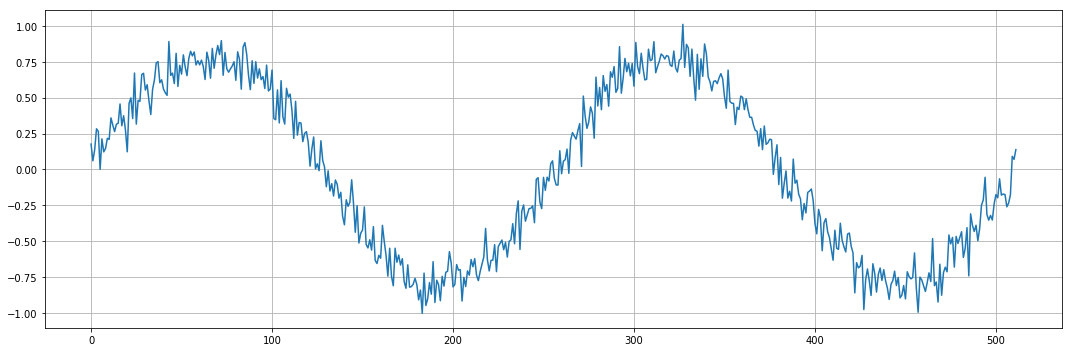

In [3]:
t = np.linspace(0,2*2*np.pi,512)
signal = 0.8*np.sin(t)
noise = 0.1*np.random.normal(size=512)
signal += noise
plt.plot(signal)
show_plot()

In [4]:
# NBVAL_IGNORE_OUTPUT
from pyhacores.moving_average.moving_average import MovingAverage
from pyha import Sfix, simulate, hardware_sims_equal, sims_close
dut = MovingAverage(window_len=32)
sims = simulate(dut, signal, simulations=simulations)

INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 513/513 [00:00<00:00, 10884.21it/s]

INFO:sim:OK!
INFO:sim:Running "RTL" simulation...
INFO:conversion:Creating top.vhd ...
INFO:conversion:MovingAverage to VHDL ...
INFO:sim:Running COCOTB & GHDL simulation....


INFO:sim:VHDL stderr: 
    loading VPI module '/home/gaspar/git/pyha/cocotb/build/libs/x86_64/libvpi.so'
    VPI module loaded!
INFO:sim:OK!
INFO:sim:Simulations completed!


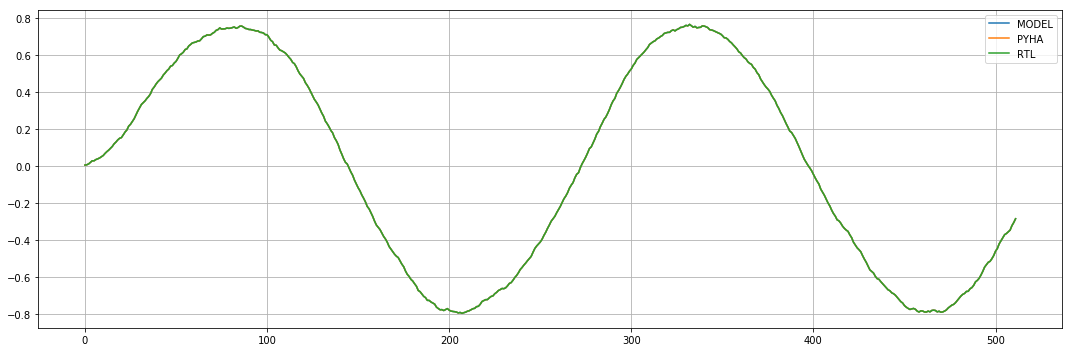

In [5]:
plt.plot(np.array(sims['MODEL']).real, label='MODEL')
plt.plot(np.array(sims['PYHA']).real, label='PYHA')
plt.plot(np.array(sims['RTL']).real, label='RTL')
show_plot()

## Low pass filter

In [6]:
# NBVAL_IGNORE_OUTPUT
inp = [0.0] * 512
inp[0] = 1.0
sims = simulate(dut, inp, simulations=simulations)

INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 513/513 [00:00<00:00, 9449.16it/s]

INFO:sim:OK!
INFO:sim:Running "RTL" simulation...
INFO:conversion:Creating top.vhd ...
INFO:conversion:MovingAverage to VHDL ...
INFO:sim:Running COCOTB & GHDL simulation....


INFO:sim:VHDL stderr: 
    loading VPI module '/home/gaspar/git/pyha/cocotb/build/libs/x86_64/libvpi.so'
    VPI module loaded!
INFO:sim:OK!
INFO:sim:Simulations completed!


## Matched filter

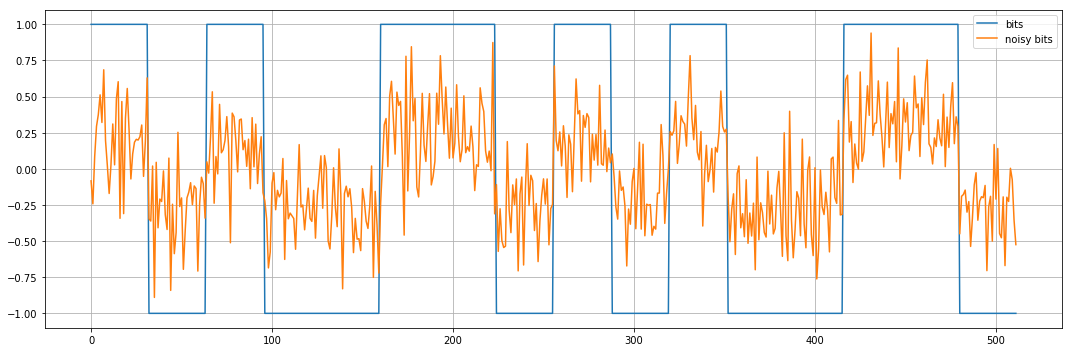

In [7]:
bits = [1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0]
oversample = np.array([[x] * 32 for x in bits]).flatten()
noisy = (oversample + np.random.normal(size=len(oversample))) * 0.25
plt.plot(oversample, label='bits')
plt.plot(noisy, label='noisy bits')
show_plot()

In [8]:
# NBVAL_IGNORE_OUTPUT
sims = simulate(dut, noisy, simulations=simulations)

INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 513/513 [00:00<00:00, 10592.67it/s]

INFO:sim:OK!
INFO:sim:Running "RTL" simulation...
INFO:conversion:Creating top.vhd ...
INFO:conversion:MovingAverage to VHDL ...
INFO:sim:Running COCOTB & GHDL simulation....


INFO:sim:VHDL stderr: 
    loading VPI module '/home/gaspar/git/pyha/cocotb/build/libs/x86_64/libvpi.so'
    VPI module loaded!
INFO:sim:OK!
INFO:sim:Simulations completed!


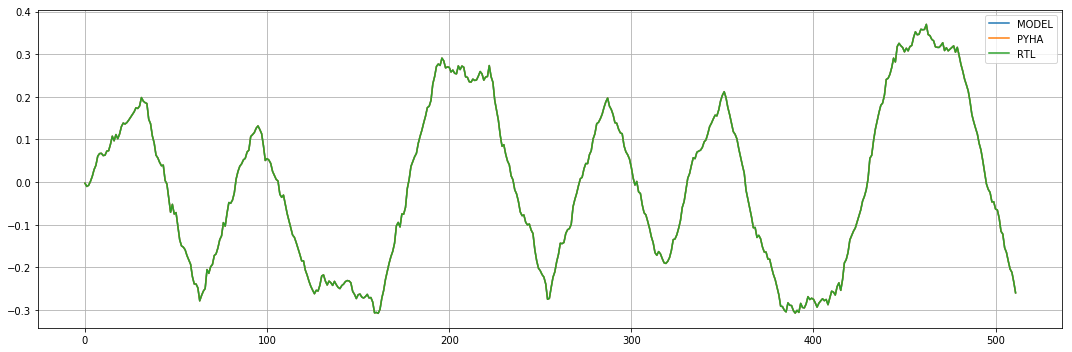

In [9]:
plt.plot(np.array(sims['MODEL']).real, label='MODEL')
plt.plot(np.array(sims['PYHA']).real, label='PYHA')
plt.plot(np.array(sims['RTL']).real, label='RTL')
show_plot()

# Limitations

## Fixed-point
Expects standard FPGA Fixed point format i.e 18 bits (incl. sign) and scaled to -1...1 range.

In [10]:
print(f'Minimum number representabe: {2**-17}')

Minimum number representabe: 7.62939453125e-06


### Example with too small input values:

In [11]:
# NBVAL_IGNORE_OUTPUT
small_noisy = noisy *  0.0001
sims = simulate(dut, small_noisy, simulations=simulations)

INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 513/513 [00:00<00:00, 11106.24it/s]

INFO:sim:OK!
INFO:sim:Running "RTL" simulation...
INFO:conversion:Creating top.vhd ...
INFO:conversion:MovingAverage to VHDL ...
INFO:sim:Running COCOTB & GHDL simulation....


INFO:sim:VHDL stderr: 
    loading VPI module '/home/gaspar/git/pyha/cocotb/build/libs/x86_64/libvpi.so'
    VPI module loaded!
INFO:sim:OK!
INFO:sim:Simulations completed!


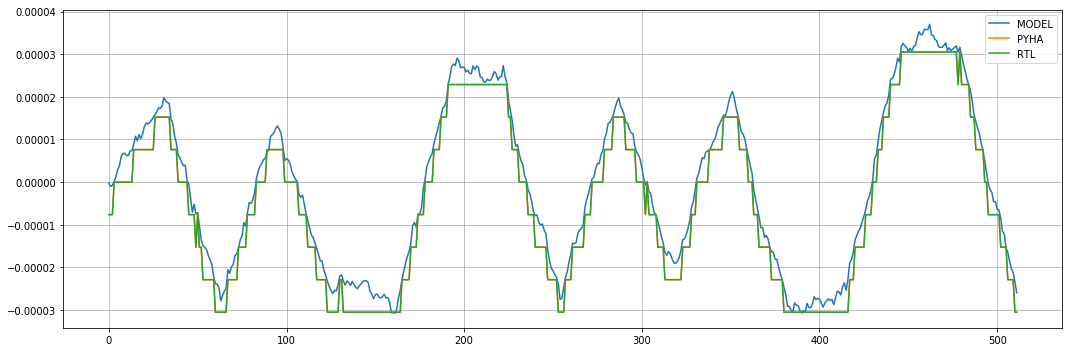

In [12]:
plt.plot(np.array(sims['MODEL']).real, label='MODEL')
plt.plot(np.array(sims['PYHA']).real, label='PYHA')
plt.plot(np.array(sims['RTL']).real, label='RTL')
show_plot()

### Example with too large input values:

In [13]:
# NBVAL_IGNORE_OUTPUT
small_noisy = noisy *  8
sims = simulate(dut, small_noisy, simulations=simulations)

INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...


INFO:sim:Running "PYHA" simulation...


100%|██████████| 513/513 [00:00<00:00, 7932.83it/s]

INFO:sim:OK!
INFO:sim:Running "RTL" simulation...
INFO:conversion:Creating top.vhd ...
INFO:conversion:MovingAverage to VHDL ...
INFO:sim:Running COCOTB & GHDL simulation....


INFO:sim:VHDL stderr: 
    loading VPI module '/home/gaspar/git/pyha/cocotb/build/libs/x86_64/libvpi.so'
    VPI module loaded!
INFO:sim:OK!
INFO:sim:Simulations completed!


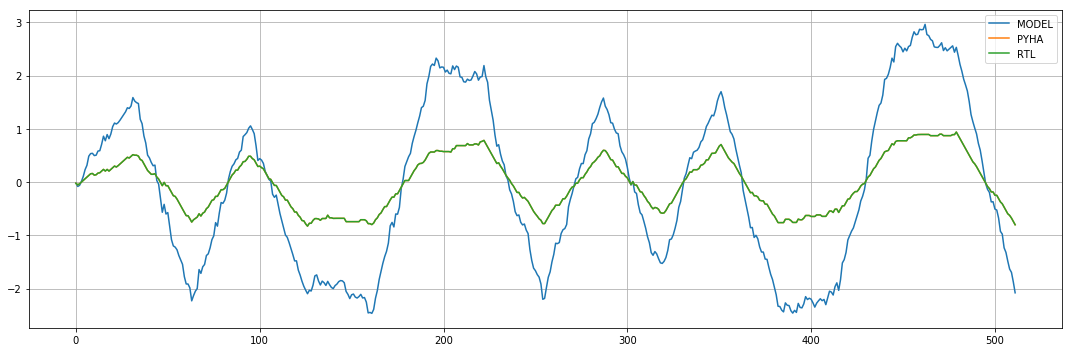

In [14]:
plt.plot(np.array(sims['MODEL']).real, label='MODEL')
plt.plot(np.array(sims['PYHA']).real, label='PYHA')
plt.plot(np.array(sims['RTL']).real, label='RTL')
show_plot()

## Conclusion
Keep inputs in 1 .. -1 range and expect outputs in 1 .. -1 range.

# Synthesis

In [15]:
# NBVAL_IGNORE_OUTPUT
output_dir = '/tmp/pyha_output'
dut = MovingAverage(window_len=32)
sims = simulate(dut, signal, simulations=['PYHA', 'GATE'], conversion_path=output_dir)

INFO:sim:Converting model to hardware types ...
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 513/513 [00:00<00:00, 10911.31it/s]

INFO:sim:OK!
INFO:sim:Running "GATE" simulation...
INFO:conversion:Creating top.vhd ...
INFO:conversion:MovingAverage to VHDL ...
INFO:sim:Running quartus map...will take time.


INFO:sim:Analysis & Synthesis Status : Successful - Tue Jul 31 18:32:49 2018
INFO:sim:Quartus Prime Version : 17.1.0 Build 590 10/25/2017 SJ Lite Edition
INFO:sim:Revision Name : quartus_project
INFO:sim:Top-level Entity Name : top
INFO:sim:Family : Cyclone IV E
INFO:sim:Total logic elements : 82
INFO:sim:    Total combinational functions : 64
INFO:sim:    Dedicated logic registers : 52
INFO:sim:Total registers : 52
INFO:sim:Total pins : 38
INFO:sim:Total virtual pins : 0
INFO:sim:Total memory bits : 522
INFO:sim:Embedded Multiplier 9-bit elements : 0
INFO:sim:Total PLLs : 0
INFO:sim:Running netlist writer.
INFO:sim:Running COCOTB & GHDL simulation....
INFO:sim:VHDL stderr: 
    loading VPI module '/home/gaspar/git/pyha/cocotb/build/libs/x86_64/libvpi.so'
    VPI module loaded!
INFO:sim:OK!
INFO:sim:Simulations completed!


In [16]:
assert hardware_sims_equal(sims)

INFO:sim:Testing hardware simulations equality...
INFO:sim:sims_close(rtol=1e-16, atol=1e-16)
INFO:sim:Using "PYHA" as golden output
INFO:sim:PYHA OK!
INFO:sim:GATE OK!


In [17]:
from pyha.simulation.vhdl_simulation import VHDLSimulation
print(f'Logic elements: {VHDLSimulation.last_logic_elements}')
print(f'Memory: {VHDLSimulation.last_memory_bits}')
print(f'Multipler (9bit): {VHDLSimulation.last_multiplier}')

Logic elements: 82
Memory: 522
Multipler (9bit): 0
